# 기계학습 기말과제
###                                                컴퓨터학과 2014210007 서영남

### 1. 실험 내용에 대한 전체 요약
이 실험은 census income data set을 이용해서 여러 classification model을 설계해 각 model의 성능과 결과를 비교함으로써 data set에 대해 깊은 이해를 하는 데 그 목적이 있다. Data set에 대해 전반적인 이해가 되어야 model을 제대로 설계할 수 있기 때문에 본격적인 설계 전에 각 attribute에 대한 이해를 완벽하게 하려고 노력했다. attribute 사이의 관계를 파악하고, 필요 없는 attribute는 삭제하고 missing value를 처리하는 등의 preprocessing 작업을 먼저 했다. 그리고 data set을 모델에 적용하기 위해 적절하게 가공했고, 전체 data set을 training set, test set, validation set으로 나누었다. 마지막으로 여러 classifier를 data set에 적용하고 결과에 따라 model의 세부사항을 수정하는 작업을 했다. 

### 2. 선정 데이터에 대한 설명 및 url
1) 이름
- Census Income Data set

2) Data set에 대한 설명
- 전체 instance 수는 48842이고 이는 unknown/missing value를 포함한 개수이다. 따라서 missing value에 대한 전처리 작업을 해줘야 한다. 
- 전체 attribute 수는 14개이며 8개의 categorical attributes, 6개의 continuous attributes를 가진다. 각 attribute의 값들은 다음과 같다. 

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- 이 data set의 attribute들을 통해서 예측하고자 하는 것은 어떤 사람이 1년에 50K 이상을 벌 수 있는지 여부이다. 참고로, 전체 instance 중 76%가 50K이하의 salary를 받는 것으로 나타난다. 

3) url
http://archive.ics.uci.edu/ml/datasets/Census+Income

4) continous attributes 분포

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
train_path = 'C:/anaconda/dataset/adult.csv'
test_path = 'C:/anaconda/dataset/adult_test.csv'
adult_train = pd.read_csv(train_path, na_values = " ?")
adult_test = pd.read_csv(test_path, na_values = " ?")
adult_train.describe()

,age,final weight,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 3. 실험 설계 및 방법
### (1) Preprocessing

#### unknown data 처리
data description을 통해 알 수 있듯이, unknown data는 '?'로 표시되어있다. 
이 data set은 충분히 크기 때문에 그 값들을 null 값으로 바꿔준 후에 이를 포함한 instance는 모두 삭제했다. 

In [2]:
adult_train = adult_train.dropna(axis=0, how='any')
adult_test = adult_test.dropna(axis=0, how='any')
adult_train.count()

age               30162
workclass         30162
final weight      30162
education         30162
education-num     30162
marital-status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital-gain      30162
capital-loss      30162
hours-per-week    30162
native-country    30162
Class             30162
dtype: int64

#### numeric attribute을 통한 분석(1)
아래의 그림은 numeric attribute에 대한 boxplot 그래프들이다. 
age, education-num, hours-per-week의 그림을 보면, Class(50K 초과/50K 이하)에 따라서 그 분포의 차이가 눈에 띄게 나타남을 알 수 있다. 예를 들어, class - education-num 그래프를 보면, education-num 값이 큰 쪽에 50K> Class가 더 많이 분포한다.
따라서 이 3개의 attribute은 Class를 예측하는 데 큰 도움이 된다는 것을 알 수 있다. 

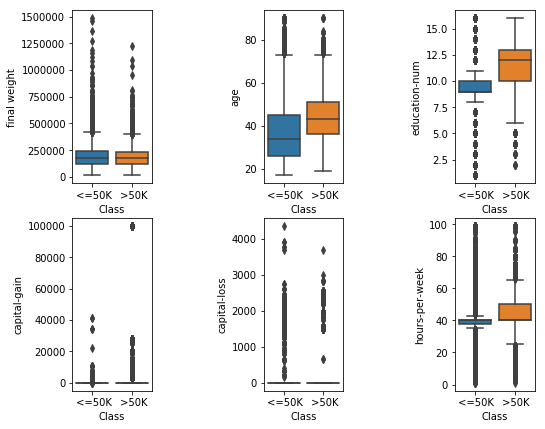

In [3]:
fig = plt.figure(figsize=(10, 7))
plt.subplot(2,6,1)
sns.boxplot(x = 'Class', y = 'final weight', data = adult_train)
plt.subplot(2,6,3)
sns.boxplot(x = 'Class', y = 'age', data = adult_train)
plt.subplot(2,6,5)
sns.boxplot(x = 'Class', y = 'education-num', data = adult_train)
plt.subplot(2,6,7)
sns.boxplot(x = 'Class', y = 'capital-gain', data = adult_train)
plt.subplot(2,6,9)
sns.boxplot(x = 'Class', y = 'capital-loss', data = adult_train)
plt.subplot(2,6,11)
sns.boxplot(x = 'Class', y = 'hours-per-week', data = adult_train)

#### numeric attribute을 통한 분석(2)
아래는 numeric attribute들에 관련된 통계분석 결과들이다. 주목할 점은, capital-gain과 captial-loss attribute의 최소값이 각각 0인데 75%지점까지의 값 모두 0인 것을 확인할 수 있다. 따라서 자세히 확인하기 위해 value_counts() 함수를 이용해보면, attribute에 대해 0의 값을 가진 instance가 각각 27624, 28735개 임을 확인할 수 있다. 이를 통해 이 두 attribute는 Class를 예측하는 데 큰 기여를 할 수 없다는 것을 알 수 있다. 

In [4]:
adult_train.describe()

,age,final weight,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
adult_train['capital-gain'].value_counts()

0        27624
15024      337
7688       270
7298       240
99999      148
3103        94
5178        91
5013        69
4386        67
3325        53
8614        52
2174        46
10520       43
4650        40
4064        40
14084       39
3137        36
20051       33
27828       32
3908        31
2829        30
594         28
6849        26
14344       26
13550       25
4787        22
2885        22
3411        21
1055        21
2597        20
         ...  
4687         3
3418         3
2228         3
6360         3
5721         3
2936         3
6723         2
2961         2
3456         2
2062         2
41310        2
3432         2
25124        2
2009         2
7896         2
18481        2
11678        2
2387         1
5060         1
7978         1
2538         1
2993         1
1173         1
1086         1
6097         1
401          1
22040        1
4931         1
1455         1
1639         1
Name: capital-gain, Length: 118, dtype: int64

In [6]:
adult_train['capital-loss'].value_counts()

0       28735
1902      194
1977      162
1887      155
1848       50
1485       45
2415       45
1740       41
1876       39
1590       37
1672       34
1602       34
2258       25
1564       24
1741       23
1980       23
1669       23
2001       21
2051       21
1579       20
1719       20
2002       20
1408       19
1974       18
2377       17
1504       16
1721       16
2339       14
2179       14
1762       13
        ...  
1668        3
1735        2
1755        2
2352        2
2149        2
1138        2
810         2
3683        2
1648        2
2238        2
1816        2
2754        2
3900        2
974         2
2129        2
3770        2
3004        1
2080        1
4356        1
1944        1
2282        1
155         1
2201        1
2457        1
1844        1
419         1
1411        1
1539        1
2472        1
2467        1
Name: capital-loss, Length: 90, dtype: int64

#### nominal attribute을 통한 분석
country attribute의 91%가 United States,
race attribute의 85.9%가 White이기 때문에 이 두 attribute도 Class를 예측하는 데 큰 기여를 할 수 없음을 알 수 있다. 

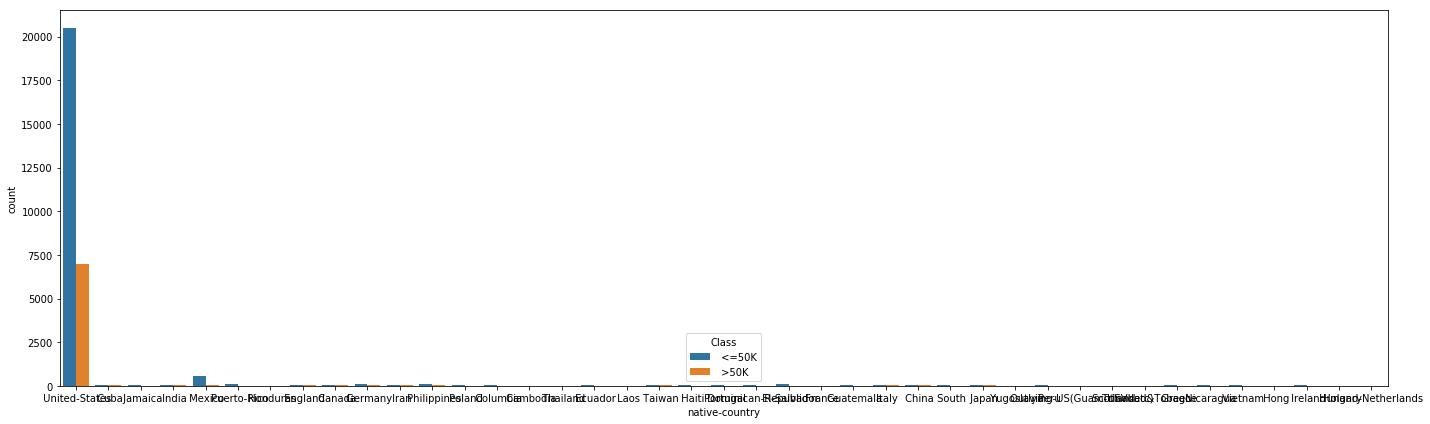

In [7]:
fig = plt.figure(figsize=(20,6))
sns.countplot('native-country', hue = 'Class', data=adult_train)
plt.tight_layout()
plt.show()

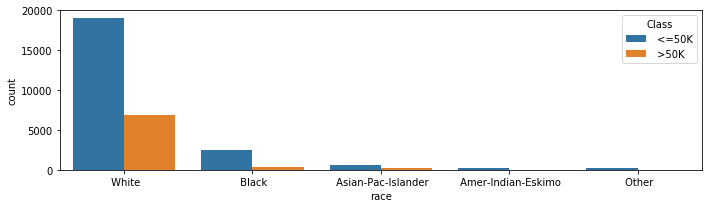

In [8]:
fig = plt.figure(figsize=(10,3))
sns.countplot('race', hue = 'Class', data=adult_train)
plt.tight_layout()
plt.show()

In [9]:
(adult_train['native-country'].value_counts() / adult_train.shape[0]).head()

 United-States    0.911876
 Mexico           0.020224
 Philippines      0.006233
 Germany          0.004244
 Puerto-Rico      0.003614
Name: native-country, dtype: float64

In [10]:
(adult_train['race'].value_counts() / adult_train.shape[0]).head()

 White                 0.859790
 Black                 0.093396
 Asian-Pac-Islander    0.029673
 Amer-Indian-Eskimo    0.009482
 Other                 0.007659
Name: race, dtype: float64

#### 상관관계를 통한 분석(1)
numeric attribute들 사이의 상관관계를 확인하기 위해 heatmap을 이용했다. 
밝을수록 양의 상관관계를 가진다는 것을 통해 밑의 그래프를 보면, 모두 어두운 값들을 나타내는 것으로 보아 numeric attribute들 사이에는 상관관계가 거의 없다는 것을 알 수 있다. 

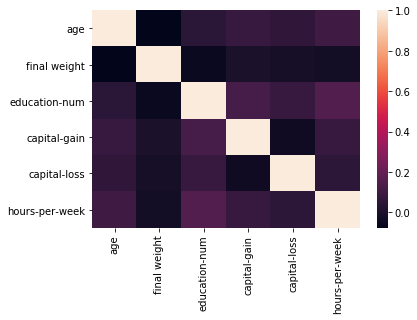

In [11]:
corr = adult_train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#### 상관관계를 통한 분석(2)
numeric attribute 사이의 상관관계를 확인해봤으니, nominal attribute과 numeric attribute 사이의 상관관계도 파악해볼 필요가 있다. 아래의 함수 number_encode_features는 nominal attribute의 값들을 숫자로 할당하는 함수로, 이를 이용해 각 attribute 사이의 상관관계를 모두 파악할 수 있다. 
이를 통해 알 수 있는 것은 education-num과 education 사이에서 높은 상관관계를 보이므로 둘 중 한 attribute를 삭제해야 한다는 것이다. numeric attribute가 더 활용하기 쉽기 때문에 여기서는 education attribute를 삭제할 것이다. 

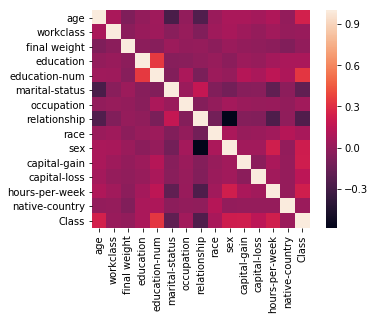

In [12]:
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as preprocessing
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, _ = number_encode_features(adult_train)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [13]:
del adult_train["education"]
del adult_test["education"]

#### attribute을 통한 데이터 분석 결과
Class를 예측하는 데 큰 기여를 하지 못할 것으로 예측되는 attribute는 'capital-gain', 'capital-loss', 'native-country', 'race'이다. 따라서 이 attribute들을 제거하고 model을 만든 결과와 제거하지 않은 상태에서 model을 만든 결과를 비교해볼 것이다. 이렇게 attribute을 제거한 data set에는 'better'이라는 표시가 붙어있다. 

In [14]:
adult_train_better = adult_train.copy()
adult_test_better = adult_test.copy()
del adult_train_better["capital-gain"]
del adult_train_better["capital-loss"]
del adult_train_better["native-country"]
del adult_train_better["race"]
del adult_test_better["capital-gain"]
del adult_test_better["capital-loss"]
del adult_test_better["native-country"]
del adult_test_better["race"]

### (2) data encoding
nominal attribute들의 값을 숫자로 encoding하는 과정이 필요하다. 이때, 사용할 수 있는 방법에는 OneHotEncoder와 OrdinalEncoder가 있다. 여기서 각 값들에 따라 할당되어야 하는 숫자의 크기가 달라져야 하는 attribute은 없기 때문에 OneHotEncoder를 사용했다. 

In [15]:
from sklearn.preprocessing import  OrdinalEncoder
ord_enc = OrdinalEncoder()

ord_enc.fit(adult_test[['Class']])
adult_test[['Class']] = ord_enc.transform(adult_test[['Class']])
one_hot_columns = ['workclass','marital-status','occupation','relationship','race','sex','native-country']
adult_test_new = pd.get_dummies(adult_test, columns =  one_hot_columns, drop_first=True)

ord_enc.fit(adult_train[['Class']])
adult_train[['Class']] = ord_enc.transform(adult_train[['Class']])
one_hot_columns = ['workclass','marital-status','occupation','relationship','race','sex','native-country']
adult_train_new = pd.get_dummies(adult_train, columns =  one_hot_columns, drop_first=True)

del adult_train_new["native-country_ Holand-Netherlands"]

In [16]:
ord_enc.fit(adult_train_better[['Class']])
adult_train_better[['Class']] = ord_enc.transform(adult_train_better[['Class']]) 
one_hot_columns2 = ['workclass','marital-status','occupation','relationship', 'sex']
adult_train_better_new = pd.get_dummies(adult_train_better, columns =  one_hot_columns2, drop_first=True)

ord_enc.fit(adult_test_better[['Class']])
adult_test_better[['Class']] = ord_enc.transform(adult_test_better[['Class']]) 
one_hot_columns2 = ['workclass','marital-status','occupation','relationship', 'sex']
adult_test_better_new = pd.get_dummies(adult_test_better, columns =  one_hot_columns2, drop_first=True)

### (3) Data set 나누기
여기서는 data set을 이미 training set과 test set으로 나눠줬기 때문에 training set만 validation set과 training set으로 나누면 된다. 여기서는 validation set과 training set 사이의 크기 비율을 1:3으로 정했다.   

In [17]:
adult_train = adult_train_new.sample(frac=0.75)
adult_valid = adult_train_new.drop(index = adult_train.index)
adult_train_x1 = adult_train.loc[:, 'age':'hours-per-week']
adult_train_x2 = adult_train.loc[:, 'workclass_ Local-gov': 'native-country_ Yugoslavia']
adult_train_x = pd.concat([adult_train_x1, adult_train_x2], axis = 1)
adult_train_y = adult_train['Class']
adult_valid_x1 = adult_valid.loc[:, 'age':'hours-per-week']
adult_valid_x2 = adult_valid.loc[:, 'workclass_ Local-gov': 'native-country_ Yugoslavia']
adult_valid_x = pd.concat([adult_valid_x1, adult_valid_x2], axis = 1)
adult_valid_y = adult_valid['Class']

In [18]:
adult_test_x1 = adult_test_new.loc[:, 'age':'hours-per-week']
adult_test_x2 = adult_test_new.loc[:, 'workclass_ Local-gov': 'native-country_ Yugoslavia']
adult_test_x = pd.concat([adult_test_x1, adult_test_x2], axis = 1)
adult_test_y = adult_test_new['Class']

In [19]:
adult_train_better = adult_train_better_new.sample(frac=0.75)
adult_valid_better = adult_train_better_new.drop(index = adult_train_better.index)
adult_train_better_x1 = adult_train_better.loc[:, 'age':'hours-per-week']
adult_train_better_x2 = adult_train_better.loc[:, 'workclass_ Local-gov': 'sex_ Male']
adult_train_better_x = pd.concat([adult_train_better_x1, adult_train_better_x2], axis = 1)
adult_train_better_y = adult_train_better['Class']
adult_valid_better_x1 = adult_valid_better.loc[:, 'age':'hours-per-week']
adult_valid_better_x2 = adult_valid_better.loc[:, 'workclass_ Local-gov': 'sex_ Male']
adult_valid_better_x = pd.concat([adult_valid_better_x1, adult_valid_better_x2], axis = 1)
adult_valid_better_y = adult_valid_better['Class']

In [20]:
adult_test_better_x1 = adult_test_better_new.loc[:, 'age':'hours-per-week']
adult_test_better_x2 = adult_test_better_new.loc[:, 'workclass_ Local-gov': 'sex_ Male']
adult_test_better_x = pd.concat([adult_test_better_x1, adult_test_better_x2], axis = 1)
adult_test_better_y = adult_test_better_new['Class']

### (4) Logistic Regression
- 먼저, accuracy는 전체 data 중 제대로 분류된 data의 비율로, 밑의 confusion matrix를 통해 확인할 수 있듯이 (5518+480)/7540 = 0.795, 즉 79.5%로 나타난다. classification report를 보면, precision, recall, f1-score의 값들이 나와있다. 0이라고 예측한 데이터의 81%가 실제로 0이었고, 1이라고 예측한 데이터의 69%가 실제로 1이었음을 알 수 있다. 또한 실제 0인 데이터 중 96%가 0으로 판별되었고, 실제 1인 데이터 중 27%만이 1로 판별되었음을 알 수 있다. 이 결과의 특징은 0에 관련된 precision, recall 값이 1에 관련된 그것들보다 훨씬 높다는 것이다. 
- 한편, train set에 대한 성능과 validation set에 대한 성능의 차이가 거의 없기 때문에 overfitted 문제는 나타나지 않고 있다는 것을 알 수 있다. ROC curve를 보면 false positive rate가 커질수록 true positive rate가 작아지는 현상을 보이는데, 이는 임계값을 0에서 1로 증가시키면서 나타나는 현상이다. 즉, 임계값이 높아짐에 따라 정확도, 민감도의 수치가 떨어지므로 Class 1을 분류해내는 방법이 정교하지 않다는 것을 알 수 있다. AUC 값이 0.574에 불과하기 때문에 이 classifier는 성능이 꽤 좋지 않은 편이라고 할 수 있다. 
- 더 좋은 결과를 도출할 것이라고 예상한 data set인 better data set에 대해서는 오히려 훨씬 낮은 성능을 보였다.
- 결과적으로 test set에 대한 logistic regression의 성능은 79.3%로 나타났다. 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg1 = LogisticRegression(solver = 'liblinear')
logreg1.fit(adult_train_x, adult_train_y)
y_pred = logreg1.predict(adult_valid_x)
logreg1.score(adult_valid_x, adult_valid_y)

0.7907161803713528

In [22]:
logreg1.score(adult_train_x, adult_train_y)

0.7907346830518964

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(adult_valid_y, y_pred)
print(confusion_matrix)

[[5453  227]
 [1351  509]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(adult_valid_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      5680
         1.0       0.69      0.27      0.39      1860

   micro avg       0.79      0.79      0.79      7540
   macro avg       0.75      0.62      0.63      7540
weighted avg       0.77      0.79      0.75      7540



No handles with labels found to put in legend.


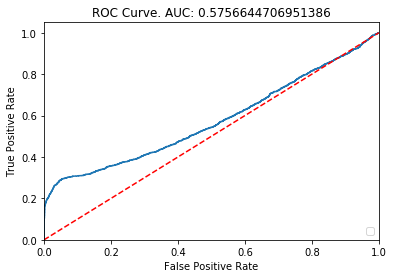

In [25]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
def plot_roc(what):
    logit_roc_auc = roc_auc_score(adult_valid_y, what.predict(adult_valid_x))
    fpr, tpr, thresholds = roc_curve(adult_valid_y, what.predict_proba(adult_valid_x)[:,1])
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
plot_roc(logreg1)

In [26]:
logreg2 = LogisticRegression(solver = 'liblinear')
logreg2.fit(adult_train_x, adult_train_y)
y_pred = logreg2.predict(adult_test_x)
logreg2.score(adult_test_x, adult_test_y)

0.7926958831341302

In [27]:
logreg3 = LogisticRegression(solver = 'liblinear')
logreg3.fit(adult_train_better_x, adult_train_better_y)
y_pred = logreg3.predict(adult_valid_better_x)
logreg3.score(adult_valid_better_x, adult_valid_better_y)

0.7493368700265252

### (5) Decision Tree
아래의 결과를 보면, validation set에 대한 accuracy는 81.1%인데 반해, train set에 대한 accuracy는 99.9%임을 알 수 있다. 즉, 첫 번째 decision tree classifier는 overfitted 문제가 있음을 알 수 있다. 

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(adult_train_x, adult_train_y)
model.score(adult_valid_x, adult_valid_y)

0.8039787798408488

In [29]:
model.score(adult_train_x, adult_train_y)

1.0

In [30]:
y_pred = model.predict(adult_valid_x)
print(classification_report(adult_valid_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      5680
         1.0       0.60      0.61      0.61      1860

   micro avg       0.80      0.80      0.80      7540
   macro avg       0.74      0.74      0.74      7540
weighted avg       0.80      0.80      0.80      7540



No handles with labels found to put in legend.


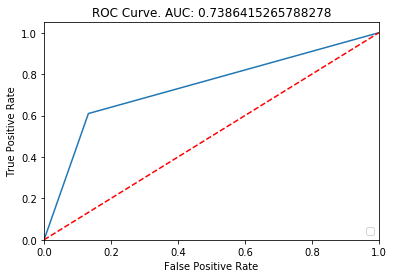

In [31]:
logit_roc_auc = roc_auc_score(adult_valid_y, model.predict(adult_valid_x))
fpr, tpr, thresholds = roc_curve(adult_valid_y, model.predict_proba(adult_valid_x)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### overfitting 피하기 위한 방법 (1) pre-pruning - 최대 깊이 설정
max_depth=3일 때 이후로는 더 커져도 같은 accuracy(84.2%)를 유지하는 것으로 보아, depth가 3 이상으로 커지면 train set을 학습하는 데만 사용되는 것으로 보인다. model3(max_depth=3)을 이용해 ROC 그래프를 그려보면, max_depth를 설정하기 전보다 약 0.1 정도 AUC 넓이가 커지는 것을 확인할 수 있으므로 성능이 훨씬 좋아진다는 것을 알 수 있다. 

In [32]:
model2 = DecisionTreeClassifier(max_depth = 2)
model2.fit(adult_train_x, adult_train_y)
model2.score(adult_valid_x, adult_valid_y)

0.8242705570291777

In [33]:
model3 = DecisionTreeClassifier(max_depth = 3)
model3.fit(adult_train_x, adult_train_y)
model3.score(adult_valid_x, adult_valid_y)

0.839920424403183

In [34]:
model4 = DecisionTreeClassifier(max_depth = 4)
model4.fit(adult_train_x, adult_train_y)
model4.score(adult_valid_x, adult_valid_y)

0.843501326259947

No handles with labels found to put in legend.


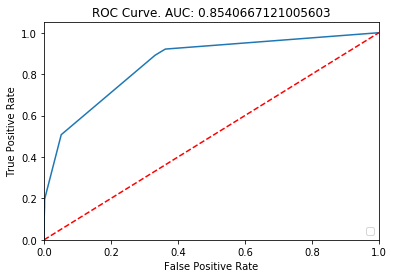

In [35]:
logit_roc_auc = roc_auc_score(adult_valid_y, model3.predict(adult_valid_x))
fpr, tpr, thresholds = roc_curve(adult_valid_y, model3.predict_proba(adult_valid_x)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [36]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model3, out_file="tree.dot", filled = True)
graph = graphviz.Source(dot_data)
with open("tree.dot") as f:
    dot_graph = f.read()

#### overfitting 피하기 위한 방법 (2) pre-pruning - leaf node value의 최소 개수 설정
leaf node의 값의 최소 개수를 지정함으로써 overfitting을 방지하는 방법도 있다. min_samples_leaf=7로 했을 때 가장 높은 성능을 보이므로 min_samples_leaf = 7로 설정한다.  

In [37]:
model6 = DecisionTreeClassifier(min_samples_leaf=6)
model6.fit(adult_train_x, adult_train_y)
model6.score(adult_valid_x, adult_valid_y)

0.8315649867374005

In [38]:
model7 = DecisionTreeClassifier(min_samples_leaf=7)
model7.fit(adult_train_x, adult_train_y)
model7.score(adult_valid_x, adult_valid_y)

0.8327586206896552

In [39]:
model8 = DecisionTreeClassifier(min_samples_leaf=8)
model8.fit(adult_train_x, adult_train_y)
model8.score(adult_valid_x, adult_valid_y)

0.8323607427055703

#### validation set을 통해 얻은 model 이용해서 test set에 대해 시험
validation set을 통해서 overfitting을 완화시키는 factor들을 찾을 수 있었다. min_samples_leaf = 7, max_depth = 3으로 했을 때 validation set에 대해 가장 좋은 성능을 보이는 것으로 나왔다. 따라서 이를 통해 test set에 대한 성능을 확인해볼 수 있다. 
test set에 대해 성능을 확인해본 결과, 83.9%의 accuracy를 보였다. 따라서 아무 조건 없이 train set에 대해 이 classifier를 적용한 것보다 더 좋은 결과를 보였다고 할 수 있다. 

In [40]:
model10 = DecisionTreeClassifier(min_samples_leaf=7, max_depth = 3)
model10.fit(adult_train_x, adult_train_y)
model10.score(adult_test_x, adult_test_y)

0.8392430278884462

No handles with labels found to put in legend.


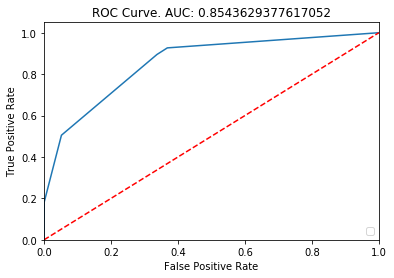

In [41]:
logit_roc_auc = roc_auc_score(adult_test_y, model10.predict(adult_test_x))
fpr, tpr, thresholds = roc_curve(adult_test_y, model10.predict_proba(adult_test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### (5) Naive Bayesian
Naive Bayesian classifier를 이용했다. Naive Bayesian classifier는 validation set에 대해서는 76.4%, test set에 대해서는 76.9%의 accuracy를 보였다. 이는 위에서 이용했던 Logistic Regression이나 Decision Tree classifier에 비해서는 낮은 accuracy이다. 이러한 약점이 나타나는 이유는 이 classifier가 모든 attribute들이 독립적이라는 가정 하에 확률을 계산하기 때문이다. 즉, 실제로는 독립적이지 않은 attribute들이라면 성능이 떨어질 수밖에 없는 것이다. 

In [42]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
clf_nb = nb.fit(adult_train_x,adult_train_y)
clf_nb.score(adult_valid_x,adult_valid_y)

0.76684350132626

In [43]:
clf_nb2 = nb.fit(adult_train_x,adult_train_y)
clf_nb2.score(adult_test_x,adult_test_y)

0.7700531208499336

No handles with labels found to put in legend.


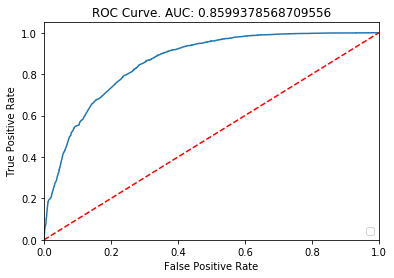

In [44]:
logit_roc_auc = roc_auc_score(adult_test_y, clf_nb2.predict(adult_test_x))
fpr, tpr, thresholds = roc_curve(adult_test_y, clf_nb2.predict_proba(adult_test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

위에서 언급한 단점을 확인하기 위해 아래는 여러 attribute들('race', 'native-country', 'capital-gain', 'capital-loss')을 삭제한 dataset에 대해 학습시키고 성능을 평가해본 것이다. 그러나 성능이 크게 달라지지 않는 것을 확인할 수 있는데 이는 삭제한 것 외에 다른 attribute들이 서로 연관되어있기 때문인 것으로 보인다. 

In [45]:
clf_nb3 = nb.fit(adult_train_better_x,adult_train_better_y)
clf_nb3.score(adult_valid_better_x,adult_valid_better_y)

0.7576923076923077

In [46]:
clf_nb4 = nb.fit(adult_train_better_x,adult_train_better_y)
clf_nb4.score(adult_test_better_x,adult_test_better_y)

0.7601593625498008

No handles with labels found to put in legend.


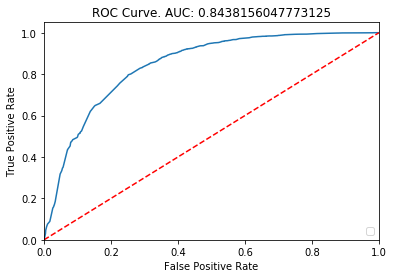

In [47]:
logit_roc_auc = roc_auc_score(adult_test_better_y, clf_nb4.predict(adult_test_better_x))
fpr, tpr, thresholds = roc_curve(adult_test_better_y, clf_nb4.predict_proba(adult_test_better_x)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### (6) KNN
kNN에서는 k개의 nearest neighbors에서 바로 그 k를 정하는 것이 관건이다. k가 너무 작으면 그 instance(neighbors)들이 잘못된 것일 가능성을 지울 수 없다. 따라서 여러 개를 골라 vote해야 하는데, 더 나은 것을 골라야 하기 때문에 k는 홀수여야 한다. 이에 따라 k값에 따라 train score과 test score를 비교하는 그래프를 그릴 수 있다. 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(adult_train_x,adult_train_y)
    train_score = knn.score(adult_train_x,adult_train_y)
    test_score = knn.score(adult_valid_x,adult_valid_y)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})

KNN : Training score - 1.0 -- Test score - 0.7236074270557029
KNN : Training score - 0.860312969675537 -- Test score - 0.7510610079575597
KNN : Training score - 0.8271151975952612 -- Test score - 0.7677718832891247
KNN : Training score - 0.8126602422420652 -- Test score - 0.7748010610079575
KNN : Training score - 0.8083281761117497 -- Test score - 0.7838196286472149
KNN : Training score - 0.8055874812129785 -- Test score - 0.7856763925729443
KNN : Training score - 0.8022279197241623 -- Test score - 0.7891246684350133
KNN : Training score - 0.7998850676332774 -- Test score - 0.7904509283819628
KNN : Training score - 0.7993988153125277 -- Test score - 0.7896551724137931
KNN : Training score - 0.7981610821324374 -- Test score - 0.7911140583554377


위의 결과를 통해, k=15일 때 test score가 최대값을 가진다는 것을 알 수 있다. 아래에 이를 적용해본 결과, 79%의 accuracy를 보인다는 것을 확인할 수 있다. 

In [49]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(adult_train_x,adult_train_y)
knn.score(adult_test_x,adult_test_y)

0.7921646746347941

No handles with labels found to put in legend.


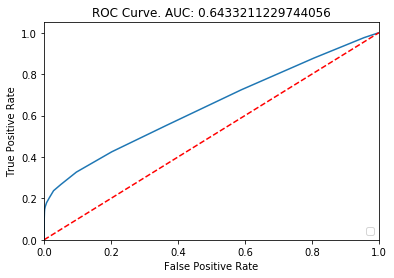

In [50]:
plot_roc(knn)

### (7) Random Forest
Decision tree가 entropy등을 통해서 attribute 중 가장 적절한 것을 골라서 순서대로 node로 정하는 것이라면, random forest는 attribute를 고를 때 randomness를 이용하는 것이다. 이렇게 생긴 여러 개 모델 중 제일 좋은 것을 고르는 방법이 random forest이다. 

In [51]:
from sklearn.ensemble import RandomForestClassifier
rndTree1 = RandomForestClassifier()
rndTree1.fit(adult_train_x,adult_train_y)
rndTree1.score(adult_valid_x,adult_valid_y)

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.843236074270557

In [52]:
rndTree2 = RandomForestClassifier()
rndTree2.fit(adult_train_x,adult_train_y)
rndTree2.score(adult_test_x,adult_test_y)

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8443559096945551

더 나은 성능을 내는 model을 만들기 위해 max_depth를 지정해봤는데 원래 default model의 성능과 크게 다른 점이 없었다. 즉, 특별한 설정 없어도 그렇게 깊은 node를 만들지 않아서 training set에 overfitted 되지는 않는다는 것을 알 수 있다. 

In [53]:
rndTree3 = RandomForestClassifier(max_depth=6)
rndTree3.fit(adult_train_x,adult_train_y)
rndTree3.score(adult_valid_x,adult_valid_y)

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8392572944297082

In [54]:
rndTree4 = RandomForestClassifier(max_depth=6)
rndTree4.fit(adult_train_x,adult_train_y)
rndTree4.score(adult_test_x,adult_test_y)

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8322045152722444

No handles with labels found to put in legend.


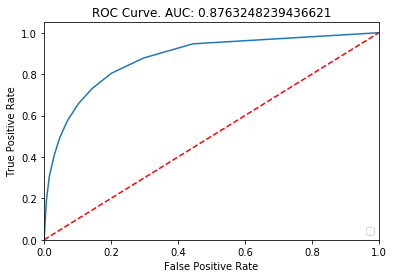

In [55]:
plot_roc(rndTree2)

### (8) Sequential Model
1) compile
- compile하기 위해 optimizer과 loss에 대해서는 지정을 해줘야 한다. 
- optimizer - sgd: stochastic gradient descent optimizer
    -> lr: learning rate, momentum: parameter that accelerateds SGD, decay: learning rate decay over each update
- loss - mean_squared_error, mean_absolute_error, squared_hinge 등 
- metrics: training과 testing 중에 model에 의해 평가되는 list of metrics. 주로, metrics = ['accuracy'] 사용함

2) fit
- batch_size: gradient update마다의 sample 수
- epochs: model을 학습시키는 epochs 수(epoch: iteration over the entire x and y data provided)

3) evaluated
- batch_size: evaluation 단계마다의 sample 수

기본적인 조건으로 Sequential model을 만들었을 때의 성능은 약 74% 정도로 나타났다.

In [56]:
import keras
from keras.models import Sequential
nn_model = Sequential()
from keras.layers import InputLayer, Dense
nn_model.add(InputLayer(input_shape = (80, )))

Using TensorFlow backend.


In [57]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [58]:
nn_model.add(Dense(units=10, activation='sigmoid'))

In [59]:
nn_model.add(Dense(units=6, activation='sigmoid'))
nn_model.add(Dense(units=3, activation='sigmoid'))
nn_model.add(Dense(units=1, activation='sigmoid'))
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [60]:
nn_model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [61]:
nn_model.fit(x=adult_train_x, y=adult_train_y, epochs=20, 
             validation_data=(adult_valid_x, adult_valid_y))

Train on 22622 samples, validate on 7540 samples
Epoch 1/20
22622/22622 [==============================] - 1s 47us/step - loss: 0.1877 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 2/20
22622/22622 [==============================] - 1s 39us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1858 - val_acc: 0.7533
Epoch 3/20
22622/22622 [==============================] - 1s 37us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 4/20
22622/22622 [==============================] - 1s 37us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 5/20
22622/22622 [==============================] - 1s 37us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 6/20
22622/22622 [==============================] - 1s 40us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 7/20
22622/22622 [==============================] - 1s 39us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc:

In [62]:
nn_model.evaluate(adult_train_x, adult_train_y, verbose = 0)

[0.18735213177915108, 0.7503315356943169]

In [63]:
nn_model.evaluate(adult_valid_x, adult_valid_y, verbose = 0)

[0.1858567385363642, 0.7533156498989945]

#### MLP for binary classification 이용
dropout을 이용했을 때 evaluation 결과에 따르면 accuracy가 약 24% 정도밖에 나오지 않기 때문에 이를 이용하지 않는 것이 성능에 더 유리하다. 

In [64]:
from keras.layers import Dropout
from keras.optimizers import RMSprop
nn_model2 = Sequential()
nn_model2.add(Dense(64, activation='relu', input_shape=(80,)))
nn_model2.add(Dropout(0.5))
nn_model2.add(Dense(64, activation='relu'))
nn_model2.add(Dropout(0.5))
nn_model2.add(Dense(1, activation='sigmoid'))
nn_model2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
nn_model.fit(x=adult_train_x, y=adult_train_y, epochs=20,
             validation_data=(adult_valid_x, adult_valid_y))

Train on 22622 samples, validate on 7540 samples
Epoch 1/20
22622/22622 [==============================] - 1s 41us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 2/20
22622/22622 [==============================] - 1s 40us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 3/20
22622/22622 [==============================] - 1s 39us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 4/20
22622/22622 [==============================] - 1s 47us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 5/20
22622/22622 [==============================] - 1s 51us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 6/20
22622/22622 [==============================] - 1s 42us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc: 0.7533
Epoch 7/20
22622/22622 [==============================] - 1s 43us/step - loss: 0.1874 - acc: 0.7503 - val_loss: 0.1859 - val_acc:

In [65]:
nn_model2.evaluate(adult_train_x, adult_train_y)

22622/22622 [==============================] - 1s 25us/step


[12.21485264241648, 0.23371054725883683]

In [66]:
nn_model2.evaluate(adult_valid_x, adult_valid_y)

7540/7540 [==============================] - 0s 23us/step


[12.29821758422042, 0.22864721485806397]

위의 MLP for binary classification에서 좋은 성능을 얻지 못했기 때문에 이번에는 Adam을 이용해서 model을 만들어보았다. 이 model의 성능은 약 75%로, 기존의 것보다 더 좋은 성능을 보이는 것으로 나타났다.  

In [67]:
from keras.optimizers import SGD, Adam
adam_opt = Adam(lr=0.02, beta_1= 0.5, beta_2=0.9)
adam_opt = Adam(lr=0.02, beta_1= 0.5, beta_2=0.9)
nn_model2.fit(x=adult_train_x, y=adult_train_y, batch_size=16, epochs=20,
              validation_data=(adult_valid_x, adult_valid_y))

Train on 22622 samples, validate on 7540 samples
Epoch 1/20
22622/22622 [==============================] - 3s 125us/step - loss: 6.2771 - acc: 0.6081 - val_loss: 3.9761 - val_acc: 0.7533
Epoch 2/20
22622/22622 [==============================] - 2s 107us/step - loss: 4.6431 - acc: 0.7113 - val_loss: 3.9761 - val_acc: 0.7533
Epoch 3/20
22622/22622 [==============================] - 2s 109us/step - loss: 4.2546 - acc: 0.7357 - val_loss: 3.9761 - val_acc: 0.7533
Epoch 4/20
22622/22622 [==============================] - 2s 109us/step - loss: 4.1766 - acc: 0.7407 - val_loss: 3.9761 - val_acc: 0.7533
Epoch 5/20
22622/22622 [==============================] - 2s 110us/step - loss: 4.1184 - acc: 0.7443 - val_loss: 3.9761 - val_acc: 0.7533
Epoch 6/20
22622/22622 [==============================] - 2s 109us/step - loss: 4.0770 - acc: 0.7470 - val_loss: 3.9761 - val_acc: 0.7533
Epoch 7/20
22622/22622 [==============================] - 2s 109us/step - loss: 4.0972 - acc: 0.7457 - val_loss: 3.9761 - v

In [68]:
nn_model2.evaluate(adult_valid_x, adult_valid_y)

7540/7540 [==============================] - 0s 22us/step


[3.9760819126503537, 0.7533156498989945]

### 4. 결론
같은 dataset에 대해서 다른 classifier로 실험을 할 때, 다른 점이 상당히 많다는 것을 통해서 dataset과 classifier의 특징을 더 자세히 알 수 있게 되었다. 첫 번째 과제에서는 dataset 자체를 보면서 알아낼 수 있는 정보보다는 여러 모델을 통해 직접 실험을 한 결과가 dataset에 대한 더 깊은 이해를 가져다준다고 생각했다. 그러나 이번 실험을 통해서는 여러 tool을 통해 dataset에 대해서도 미리 어느 정도 이해를 할 수 있음을 알았다. 또한 여러 classifier를 통해서 성능을 비교함으로써 더 나은 결과를 얻을 수 있다는 것을 알게 되었다. 